In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="darkgrid")

Base_Path = "../data/processed/"
Apache_Path = Base_Path + "apache_clean.csv"
SSH_Path = Base_Path + "ssh_clean.csv"
UNSW_Training_Path = Base_Path + "unsw_train_clean.csv"
Merged_Path = Base_Path + "final_merged.csv"


In [4]:
Apache_Read = pd.read_csv(Apache_Path)
SSH_Read = pd.read_csv(SSH_Path)
UNSW_Read = pd.read_csv(UNSW_Training_Path)
Merged_Read = pd.read_csv(Merged_Path)

Apache_Read.head(), SSH_Read.head(), UNSW_Read.head(), Merged_Read.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_5936\1702145974.py:4: DtypeWarning: Columns (0,1,3,7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Merged_Read = pd.read_csv(Merged_Path)


(             timestamp  source  ip event_type   level  \
 0  2005-12-04 04:47:44  apache NaN         E2  notice   
 1  2005-12-04 04:47:44  apache NaN         E3   error   
 2  2005-12-04 04:51:08  apache NaN         E1  notice   
 3  2005-12-04 04:51:09  apache NaN         E1  notice   
 4  2005-12-04 04:51:09  apache NaN         E1  notice   
 
                                          raw_message  \
 0  workerEnv.init() ok /etc/httpd/conf/workers2.p...   
 1            mod_jk child workerEnv in error state 6   
 2  jk2_init() Found child 6725 in scoreboard slot 10   
 3   jk2_init() Found child 6726 in scoreboard slot 8   
 4   jk2_init() Found child 6728 in scoreboard slot 6   
 
                                       event_template  is_login_attempt  \
 0                            workerEnv.init() ok <*>                 0   
 1          mod_jk child workerEnv in error state <*>                 0   
 2  jk2_init() Found child <*> in scoreboard slot <*>                 0   
 3  jk

In [5]:
print("Apache Rows: ", len(Apache_Read))
print("SSH Rows: ", len(SSH_Read))
print("UNSW Rows: ", len(UNSW_Read))
print("Merged Rows: ", len(Merged_Read))

Apache Rows:  2000
SSH Rows:  2000
UNSW Rows:  175341
Merged Rows:  179341


In [6]:
Merged_Read.isna().mean().sort_values(ascending=False).head(20)

ip                  0.990331
component           0.988848
is_success          0.988848
level               0.988848
pid                 0.988848
event_template      0.977696
raw_message         0.977696
is_login_attempt    0.977696
timestamp           0.977696
label               0.022304
total_packets       0.022304
total_bytes         0.022304
event_type          0.000000
source              0.000000
dtype: float64

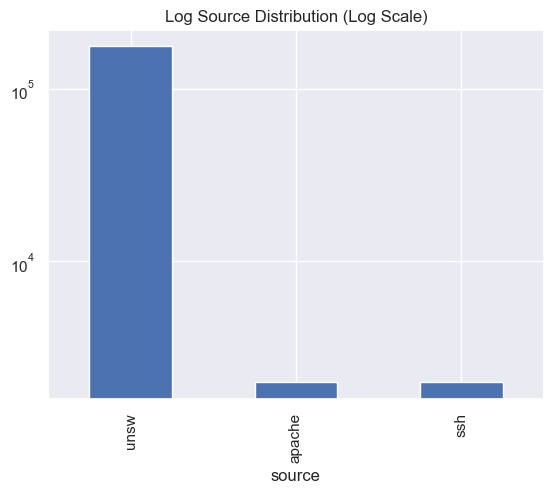

In [11]:
Merged_Read['source'].value_counts().plot(kind='bar', logy=True)
plt.title("Log Source Distribution (Log Scale)")
plt.show()

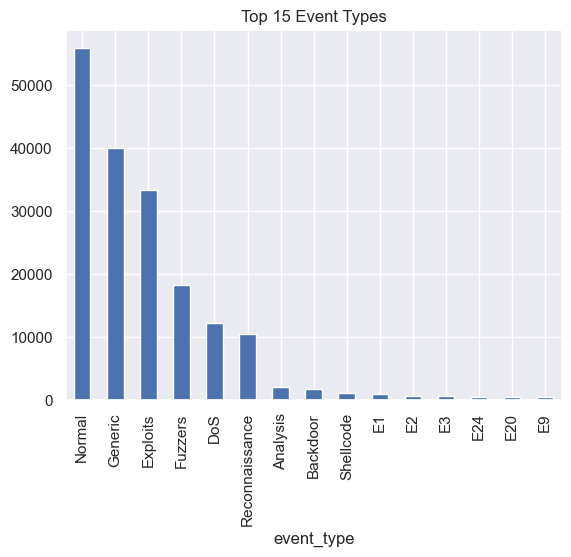

In [8]:
Merged_Read['event_type'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Event Types")
plt.show()

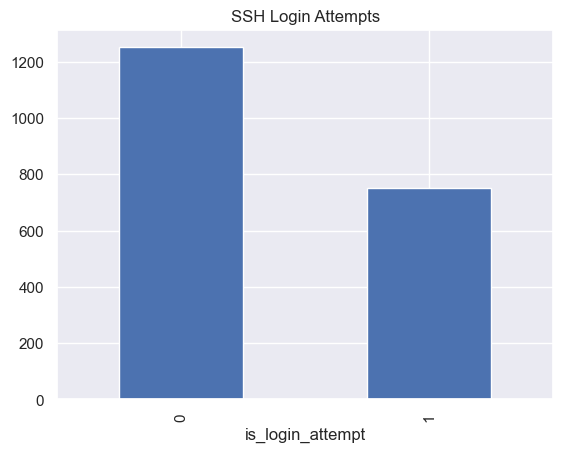

In [9]:
SSH_Read['is_login_attempt'].value_counts().plot(kind='bar')
plt.title("SSH Login Attempts")
plt.show()

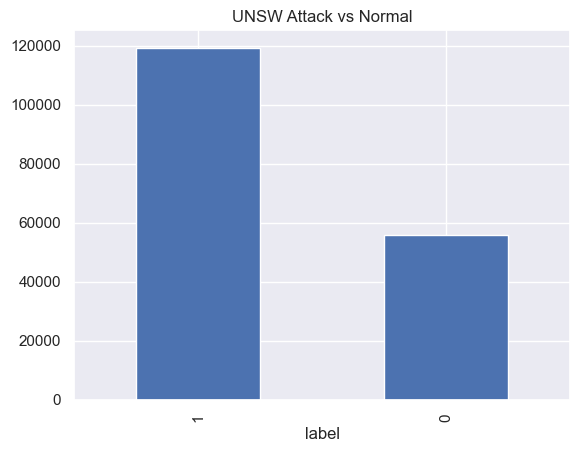

In [10]:
UNSW_Read['label'].value_counts().plot(kind='bar')
plt.title("UNSW Attack vs Normal")
plt.show()

In [12]:
SSH_Read['timestamp'] = pd.to_datetime(SSH_Read['timestamp'], errors='coerce')

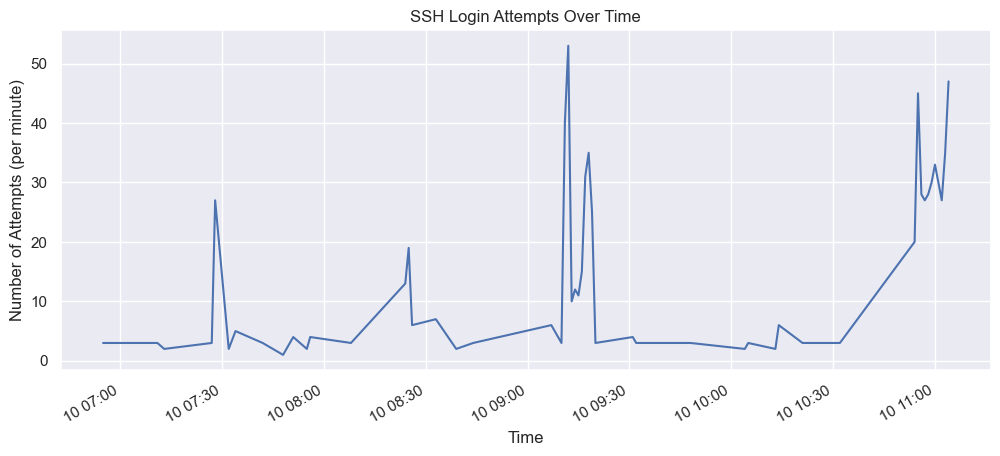

In [13]:
ssh_attempts = SSH_Read[SSH_Read['is_login_attempt'] == 1]

ssh_attempts.groupby(
    ssh_attempts['timestamp'].dt.floor('min')
).size().plot(figsize=(12,5))

plt.title("SSH Login Attempts Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Attempts (per minute)")
plt.show()

<Figure size 1200x500 with 0 Axes>

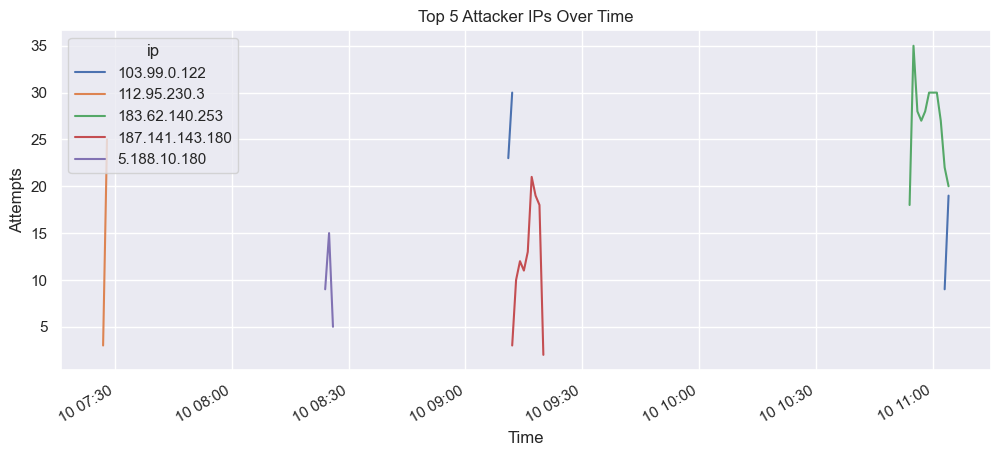

In [14]:
top_ips = ssh_attempts['ip'].value_counts().head(5).index.tolist()

filtered = ssh_attempts[ssh_attempts['ip'].isin(top_ips)]

plt.figure(figsize=(12,5))
filtered.groupby(
    [filtered['timestamp'].dt.floor('min'), 'ip']
).size().unstack().plot(figsize=(12,5))

plt.title("Top 5 Attacker IPs Over Time")
plt.xlabel("Time")
plt.ylabel("Attempts")
plt.show()

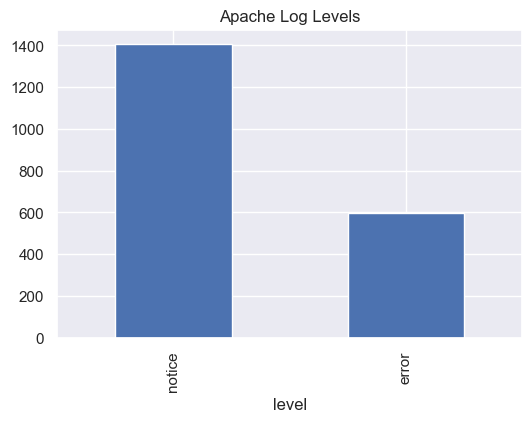

In [15]:
Apache_Read['level'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Apache Log Levels")
plt.show()

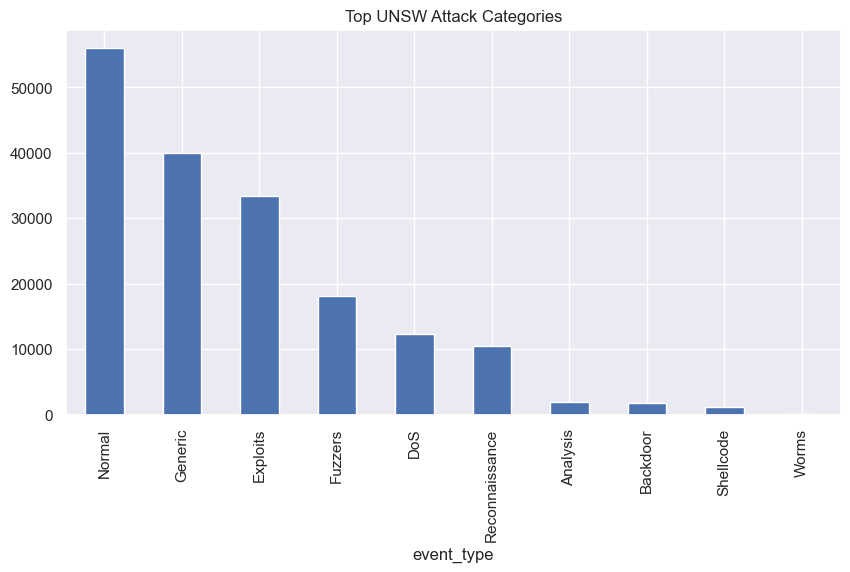

In [16]:
UNSW_Read['event_type'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.title("Top UNSW Attack Categories")
plt.show()

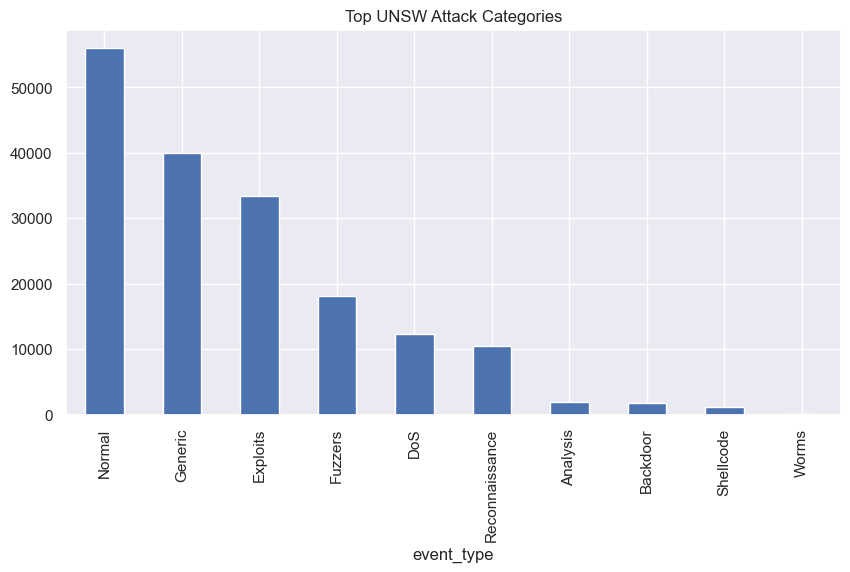

In [17]:
UNSW_Read['event_type'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.title("Top UNSW Attack Categories")
plt.show()